Build an SVM model to classify handwritten digits using the MNIST
dataset. 
 Accuracy: Overall percentage of correct predictions. 
Confusion Matrix: Provides a breakdown of correct/incorrect predictions for each digit. 
Classification Report: Detailed precision, recall, and F1-score for
each digit.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\KIIT\.cache\kagglehub\datasets\hojjatk\mnist-dataset\versions\1


In [3]:
pip install idx2numpy



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# 1. Load the MNIST Dataset from IDX Files
# -------------------------------
# The IDX files are loaded using idx2numpy.
# For training data:
train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

# For testing data:
test_images = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [6]:
# 2. Preprocess the Data
# -------------------------------
# Flatten each 28x28 image into a 784-length vector.
X_train = train_images.reshape((train_images.shape[0], -1))
y_train = train_labels
X_test = test_images.reshape((test_images.shape[0], -1))
y_test = test_labels

# Feature scaling is important for SVM performance.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# 3. Build and Train the SVM Model
# -------------------------------
# Here, we use the RBF kernel with default gamma settings.
svm_model = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)




SVC(random_state=42)

In [8]:
# -------------------------------
# 4. Make Predictions on the Test Set
# -------------------------------
y_pred = svm_model.predict(X_test_scaled)

In [9]:
# 5. Evaluate the Model
# -------------------------------

# a. Overall Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# b. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Accuracy: 96.60%
Confusion Matrix:
[[ 968    0    1    1    0    3    3    2    2    0]
 [   0 1127    3    0    0    1    2    0    2    0]
 [   5    1  996    2    2    0    1   15    9    1]
 [   0    0    4  979    1    7    0   12    7    0]
 [   0    0   12    0  944    2    4    7    3   10]
 [   2    0    1   10    2  854    6    8    7    2]
 [   6    2    1    0    4    8  930    2    5    0]
 [   1    6   13    2    3    0    0  990    0   13]
 [   3    0    4    6    6    9    3   14  926    3]
 [   4    6    5   11   12    2    0   20    3  946]]


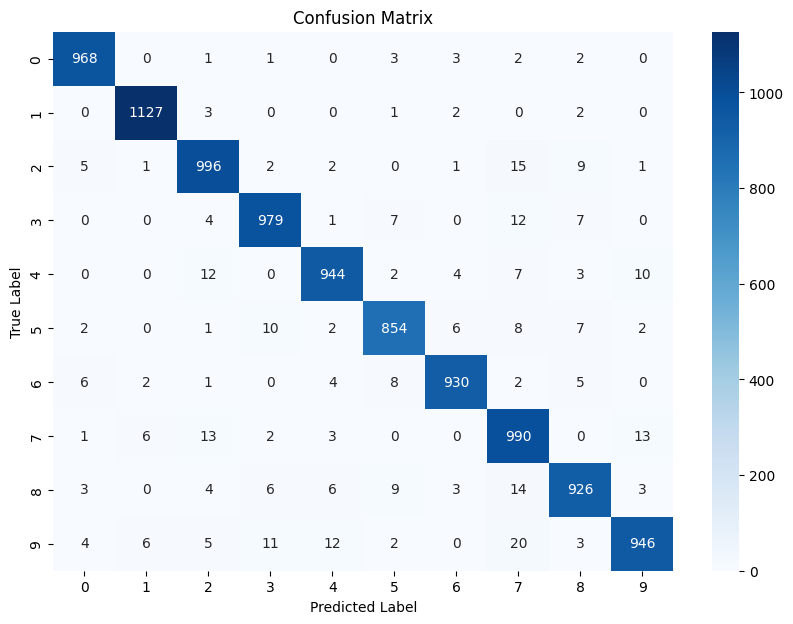

In [10]:
# Visualize the confusion matrix using a heatmap.
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



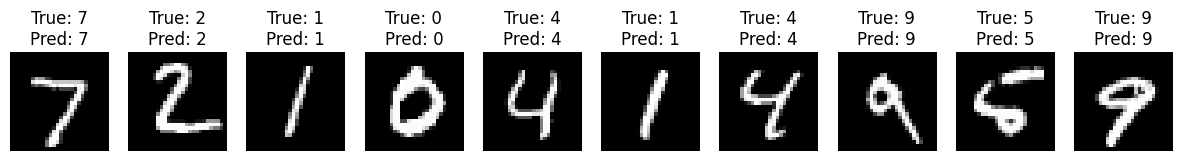

In [13]:
# c. Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)
def plot_sample_images(X, y_true, y_pred, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.show()

# Plot 10 sample images with predictions
plot_sample_images(X_test[:10], y_test[:10], y_pred[:10])